# 6.5 - Unsupervised Machine Learning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#Set Path
path = r'/Users/tristansavella/Desktop/Important Things/Data Analytics/CareerFoundry/Data Immersion/Achievement 6/Master Folder ATP/02 Data'

In [4]:
#Import df_matchstats
df_matchstats = pd.read_pickle(os.path.join(path, 'Prepared Data','df_matchstats.pkl'))

In [5]:
df_matchstats.dtypes

tourney_id            object
Year                  object
tourney_name          object
surface               object
tourney_level         object
winner_id             object
winner_ioc            object
winner_name           object
winner_age           float64
winner_rank          float64
winner_ht            float64
loser_id              object
loser_ioc             object
loser_name            object
loser_rank           float64
loser_ht             float64
loser_age            float64
best_of               object
round                 object
minutes              float64
w_#ServeGames        float64
w_#aces              float64
w_#dfs               float64
w_#ServePoints       float64
w_#1stServesIn       float64
w_#2ndServePoints    float64
w_%1stServesIn         int64
w_#1stWon            float64
w_%1stWon              int64
w_#2ndWon            float64
w_%2ndWon              int64
w_bpSaved            float64
w_#bpFaced           float64
l_#ServeGames        float64
l_#aces       

In [6]:
#drop all non-numerical variables
df_matchstats1 = df_matchstats.select_dtypes(include='number')

In [7]:
df_matchstats1.isnull().sum()
#remove missing winner and loser heights

winner_age              0
winner_rank            89
winner_ht             198
loser_rank            296
loser_ht              729
loser_age               2
minutes              1456
w_#ServeGames           0
w_#aces                 0
w_#dfs                  0
w_#ServePoints          0
w_#1stServesIn          0
w_#2ndServePoints       0
w_%1stServesIn          0
w_#1stWon               0
w_%1stWon               0
w_#2ndWon               0
w_%2ndWon               0
w_bpSaved               0
w_#bpFaced              0
l_#ServeGames           0
l_#aces                 0
l_#dfs                  0
l_#ServePoints          0
l_#1stServesIn          0
l_#2ndServePoints       0
l_%1stServesIn          0
l_#1stWon               0
l_%1stWon               0
l_#2ndWon               0
l_%2ndWon               0
l_bpSaved               0
l_#bpFaced              0
dtype: int64

In [8]:
df_matchstats1 = df_matchstats1[df_matchstats['winner_ht'].isnull()== False]
df_matchstats1 = df_matchstats1[df_matchstats['loser_ht'].isnull()== False]
df_matchstats1 = df_matchstats1[df_matchstats['loser_age'].isnull()== False]

/var/folders/lt/jbcyjbgd47xcv2f0lf4fdq2h0000gn/T/ipykernel_12247/3704266932.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_matchstats1 = df_matchstats1[df_matchstats['loser_ht'].isnull()== False]
/var/folders/lt/jbcyjbgd47xcv2f0lf4fdq2h0000gn/T/ipykernel_12247/3704266932.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_matchstats1 = df_matchstats1[df_matchstats['loser_age'].isnull()== False]


In [9]:
cols_to_drop = ['minutes', 'winner_rank', 'loser_rank']

In [10]:
df_matchstats2 = df_matchstats1.drop(columns=cols_to_drop)

### 2. The elbow technique

In [11]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [12]:
score = [kmeans[i].fit(df_matchstats2).score(df_matchstats2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/tristansavella/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tristansavella/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tristansavella/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tristansavella/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default 

[-249337782.90443707,
 -134502650.81689954,
 -101433593.80110258,
 -88413601.0436027,
 -81804462.0944255,
 -78077185.99150954,
 -75473697.17294833,
 -73422443.4105793,
 -71513144.80754094]

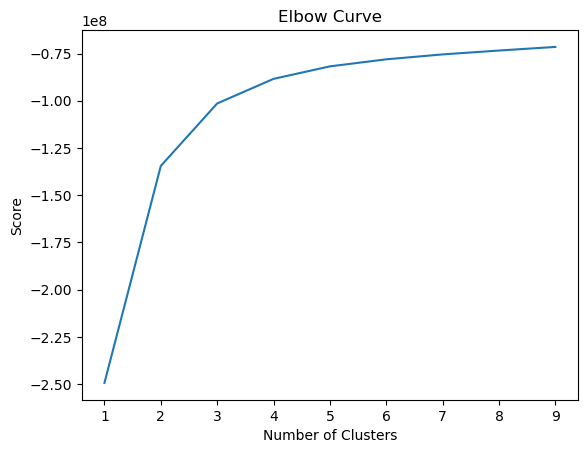

In [13]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### 3. k-means clustering

In [14]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [15]:
# Fit the k-means object to the data.

kmeans.fit(df_matchstats2)

/Users/tristansavella/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [16]:
df_matchstats2['clusters'] = kmeans.fit_predict(df_matchstats2)

/Users/tristansavella/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [17]:
df_matchstats2.head()

,winner_age,winner_ht,loser_ht,loser_age,w_#ServeGames,w_#aces,w_#dfs,w_#ServePoints,w_#1stServesIn,w_#2ndServePoints,...,l_#1stServesIn,l_#2ndServePoints,l_%1stServesIn,l_#1stWon,l_%1stWon,l_#2ndWon,l_%2ndWon,l_bpSaved,l_#bpFaced,clusters
119317,21.7,188.0,180.0,31.1,17.0,18.0,4.0,96.0,49.0,47.0,...,55.0,51.0,51,39.0,70,29.0,56,4.0,7.0,2
119318,24.5,190.0,183.0,24.3,12.0,5.0,3.0,76.0,52.0,24.0,...,32.0,42.0,43,25.0,78,18.0,42,3.0,6.0,1
119319,21.3,175.0,173.0,26.5,8.0,0.0,0.0,55.0,35.0,20.0,...,33.0,23.0,58,20.0,60,7.0,30,7.0,11.0,1
119320,19.9,183.0,185.0,18.4,10.0,5.0,1.0,53.0,28.0,25.0,...,43.0,27.0,61,29.0,67,14.0,51,6.0,8.0,1
119321,27.3,180.0,185.0,23.7,13.0,1.0,2.0,98.0,66.0,32.0,...,46.0,46.0,50,34.0,73,18.0,39,5.0,9.0,2


In [18]:
df_matchstats2['clusters'].value_counts()

clusters
1    31676
2    24198
0     5811
Name: count, dtype: int64

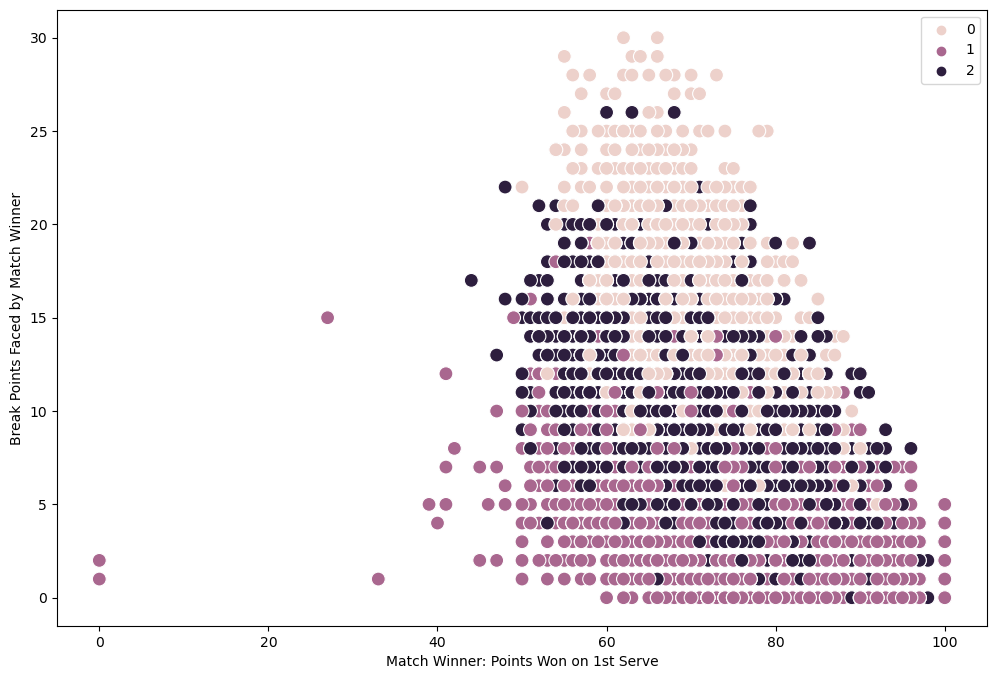

In [24]:
# Plot the clusters for the "w_%1stWon" and "w_#bpFaced" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_matchstats2['w_%1stWon'], y=df_matchstats2['w_#bpFaced'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Match Winner: Points Won on 1st Serve') # Label x-axis.
plt.ylabel('Break Points Faced by Match Winner') # Label y-axis.
plt.show()

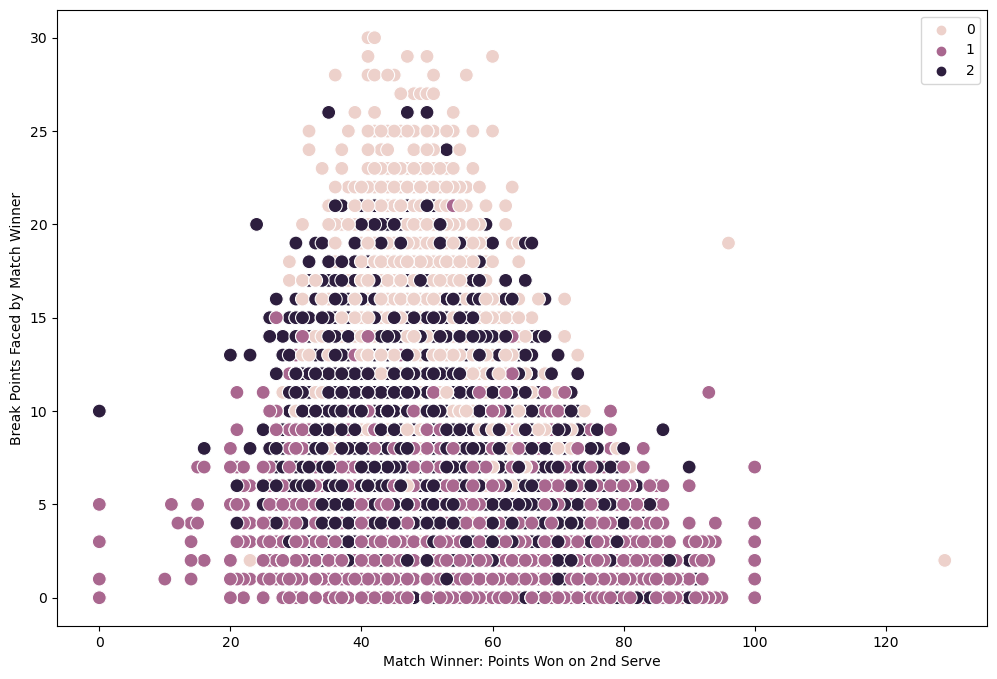

In [25]:
# Plot the clusters for the "w_%2ndWon" and "w_#bpFaced" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_matchstats2['w_%2ndWon'], y=df_matchstats2['w_#bpFaced'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Match Winner: Points Won on 2nd Serve') # Label x-axis.
plt.ylabel('Break Points Faced by Match Winner') # Label y-axis.
plt.show()

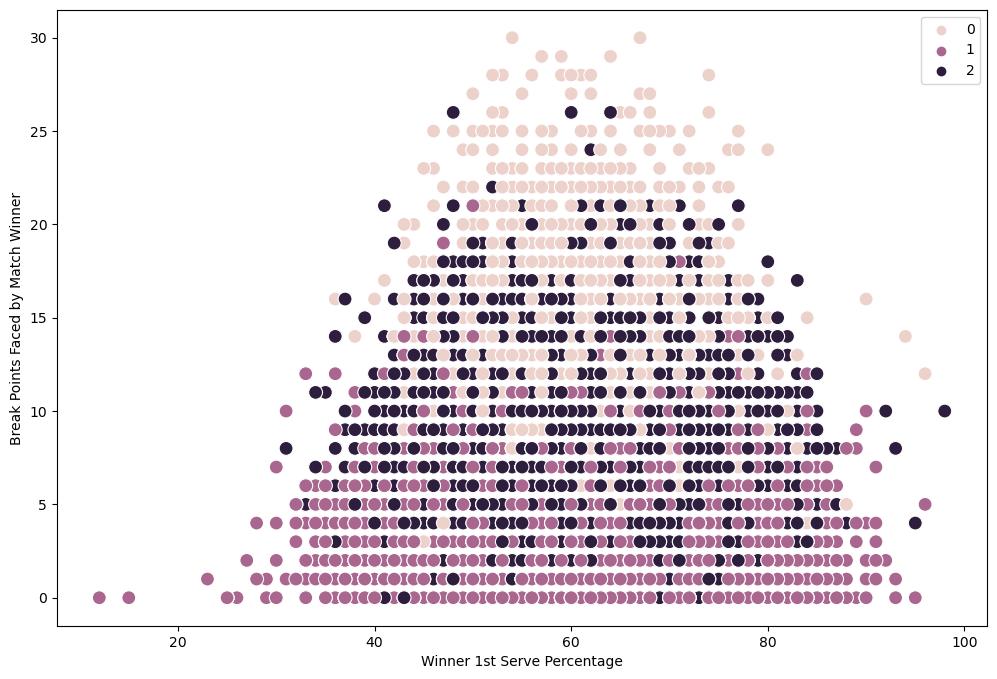

In [21]:
# Plot the clusters for the "w_%2ndWon" and "w_#bpFaced" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_matchstats2['w_%1stServesIn'], y=df_matchstats2['w_#bpFaced'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Winner 1st Serve Percentage') # Label x-axis.
plt.ylabel('Break Points Faced by Match Winner') # Label y-axis.
plt.show()

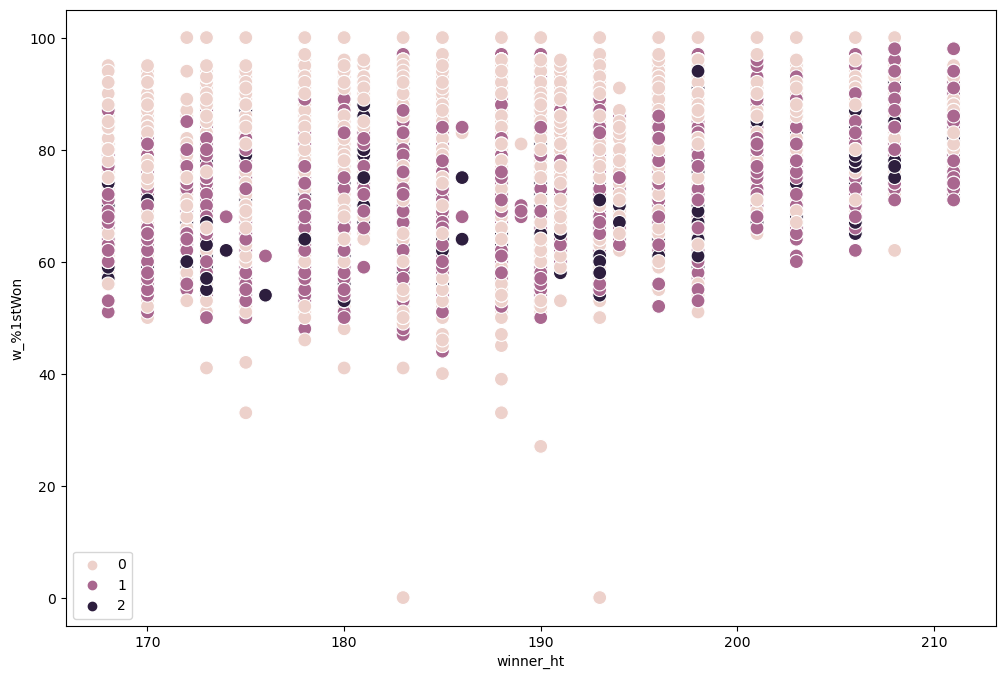

In [28]:
# Plot the clusters for the "w_%1stWon" and "winner_ht" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_matchstats2['winner_ht'], y=df_matchstats2['w_%1stWon'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('winner_ht') # Label x-axis.
plt.ylabel('w_%1stWon') # Label y-axis.
plt.show()

In [32]:
df_matchstats2.loc[df_matchstats2['clusters'] == 2, 'cluster'] = 'dark purple'
df_matchstats2.loc[df_matchstats2['clusters'] == 1, 'cluster'] = 'purple'
df_matchstats2.loc[df_matchstats2['clusters'] == 0, 'cluster'] = 'pink'

In [34]:
df_matchstats2.groupby('cluster').agg({'w_%1stWon':['mean', 'median'], 
                         'w_%2ndWon':['mean', 'median'], 
                         'w_%1stServesIn':['mean', 'median'],
                                       'w_#bpFaced':['mean', 'median'],
                          'winner_ht':['mean', 'median']})

w_%1stWon         w_%2ndWon        w_%1stServesIn         \
                  mean median       mean median           mean median   
cluster                                                                 
dark purple  73.778714   74.0  52.897180   53.0      61.328232   61.0   
pink         78.073666   78.0  58.536123   58.0      61.056931   61.0   
purple       74.553990   75.0  53.977437   54.0      61.007769   61.0   

            w_#bpFaced          winner_ht         
                  mean median        mean median  
cluster                                           
dark purple  10.161623   10.0  186.457875  185.0  
pink          3.075971    3.0  186.007989  185.0  
purple        6.389975    6.0  186.364230  185.0